Device:  cuda


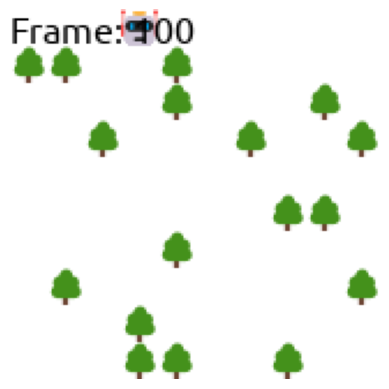

In [3]:
import torch
from gridworld.agent import Agent, LoggerAgent, SweeperAgent
from gridworld.rendering import run_simulation_with_rendering
from gridworld.exploration import ExplorationMethod, Greedy
from gridworld.tile_types import TileType
from gridworld.world import World, LoggerTrainingWorld
from models.ann import DeepQNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device: ', device)

agents: list[Agent] = [LoggerAgent()]#, SweeperAgent()]
world: World = LoggerTrainingWorld()

model_filename = '2023-07-20_15-46'
policies: list[torch.nn.Module] = [DeepQNet(agent) for agent in agents]
for policy, agent in zip(policies, agents):
    policy.load_state_dict(torch.load(f'output/{model_filename}/policy_{agent.name}.pth'))
    policy = policy.to(device)

exploration_methods: list[ExplorationMethod] = [Greedy(agent, world, device) for agent in agents]
duration = run_simulation_with_rendering(world, device, policies, agents, exploration_methods, file_name=f'output/{model_filename}/anim.gif', frame_rate=6, max_duration=100);